<a href="https://colab.research.google.com/github/alexndrmgw/desain_analisis_algo/blob/master/tugas_pagerank_m9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
myWeb = nx.DiGraph()
myPages = range(1,8)

In [52]:
connections = [(1,3),(3,5),(5,7),(7,8),(7,1),(8,1),(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(7,8)]
myWeb.add_nodes_from(myPages)
myWeb.add_edges_from(connections) 

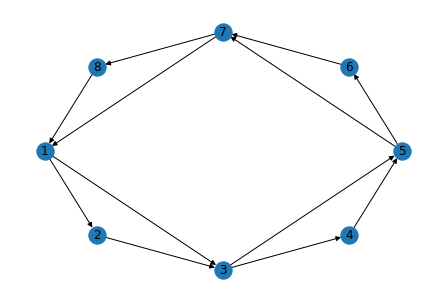

In [53]:
pos=nx.shell_layout(myWeb)
nx.draw(myWeb,pos,arrows=True, with_labels=True)
plt.show()

In [54]:
def createPageRank(aGraph):
  nodes_set = len(aGraph)
  M = nx.to_numpy_matrix(aGraph)
  outwards = np.squeeze(np.asarray(np.sum(M, axis=1)))
  prob_outwards = np.array(
      [1.0/count
      if count > 0 else 0.0 for count in outwards])
  G = np.asarray(np.multiply(M.T, prob_outwards))
  p = np.ones(nodes_set)/float(nodes_set)
  if np.min(np.sum(G,axis=0)) < 1.0:
    print('WARN : Gis subtochastic')
  return G,p


In [55]:
G,p = createPageRank(myWeb)
print(G)

[[0.  0.  0.  0.  0.  0.  0.5 1. ]
 [0.5 0.  0.  0.  0.  0.  0.  0. ]
 [0.5 1.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.5 0.  0.  0.  0.  0. ]
 [0.  0.  0.5 1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.5 0.  0.  0. ]
 [0.  0.  0.  0.  0.5 1.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.5 0. ]]
